 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Sort dataframe by ascending date
# Remove $ from values
# Change data value type to float
sp500_df = sp500_df.sort_values(by=["Date"])
sp500_df['Close']=sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename Column
sp500_returns = sp500_returns.rename(columns={
    "Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
joined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

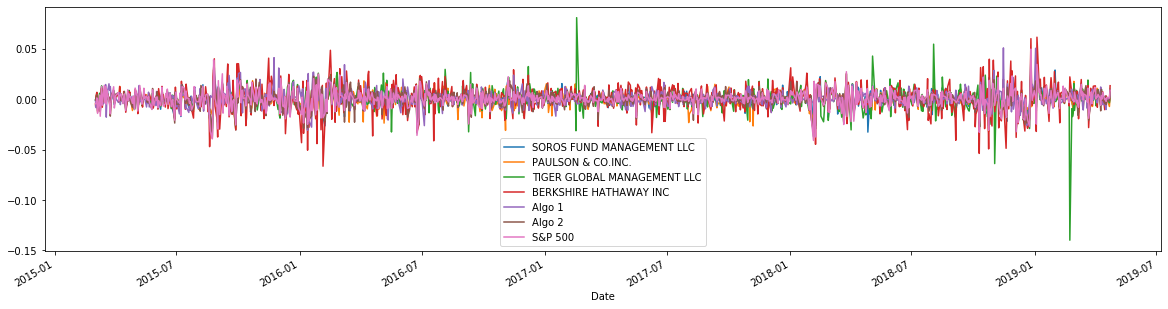

In [15]:
# Plot daily returns
joined_returns.plot(figsize=(20,5))

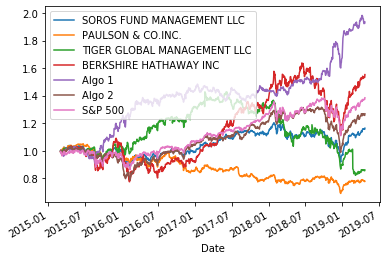

In [16]:
# Plot cumulative returns
cum_returns = (1 + joined_returns).cumprod()
cum_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

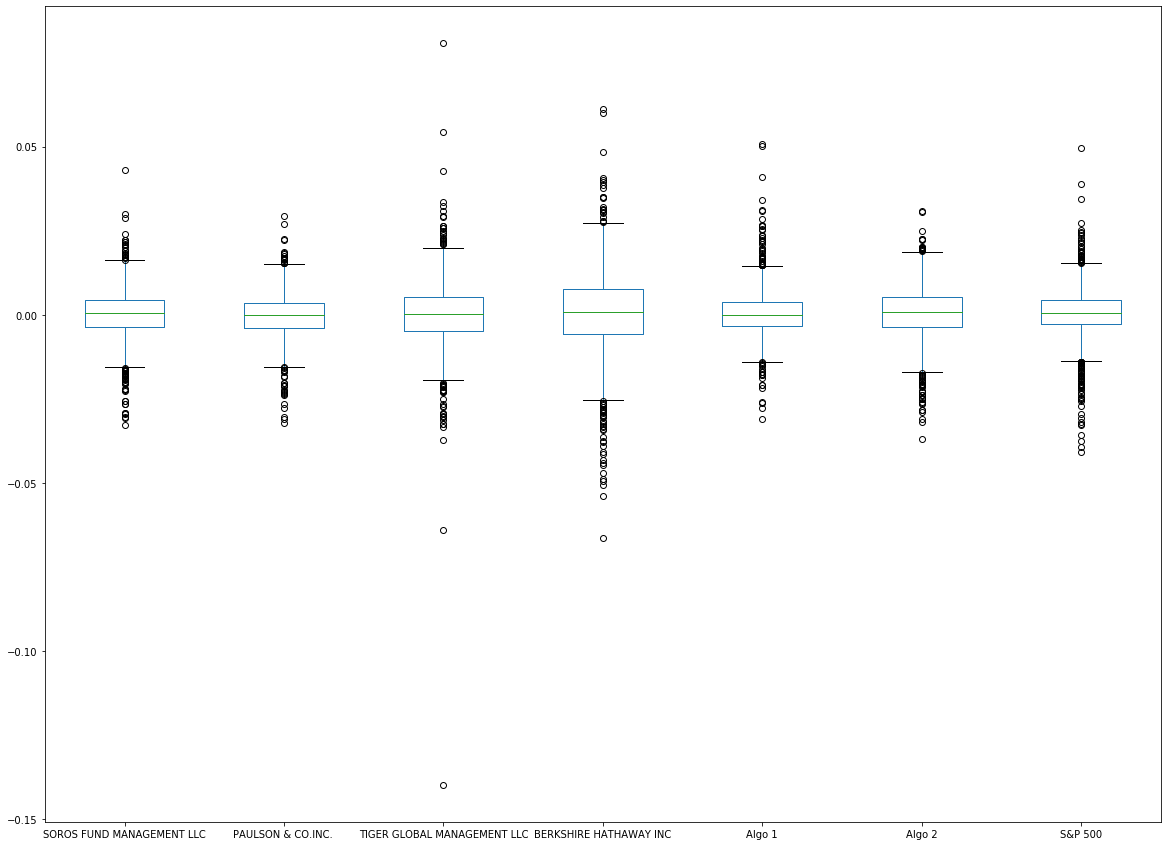

In [17]:
# Box plot to visually show risk
joined_returns.plot(kind="box", figsize = (20,15))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
joined_std = joined_returns.std()
joined_std = joined_std.sort_values(ascending=True)
joined_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [19]:
# Which portfolios are riskier than the S&P 500?
joined_std.loc[joined_std > joined_std.iloc[4]]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = joined_std * np.sqrt(252)
annual_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

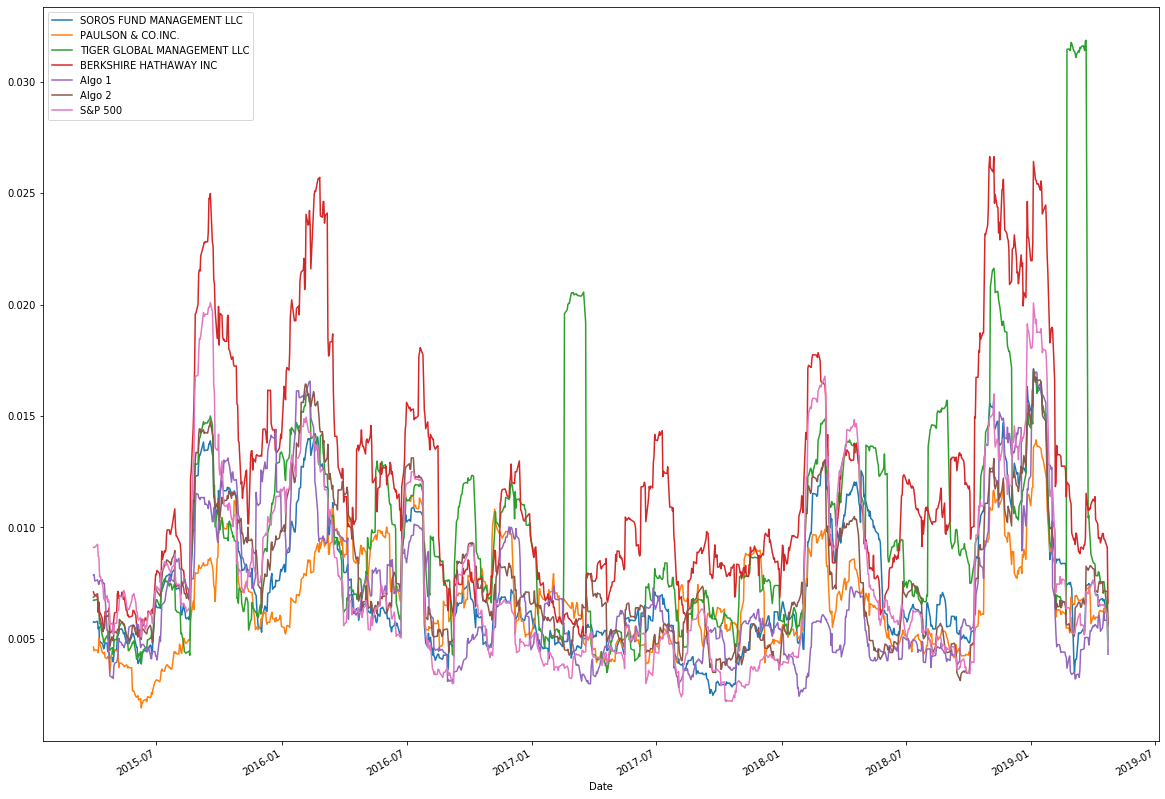

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
joined_returns.rolling(window=21).std().plot(figsize=(20,15))

In [22]:
# Construct a correlation table
correlation = joined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# First calculate the covariance of Algo 1 and S&P 500
covariance = joined_returns["Algo 1"].cov(joined_returns["S&P 500"])
covariance

1.8217749991632826e-05

In [24]:
# Next calculate the variance of S&P 500
variance = joined_returns["S&P 500"].var()
variance

7.316632424648712e-05

In [25]:
# Finally, calculate Beta
algo_beta = covariance / variance
algo_beta

0.24899091459425748

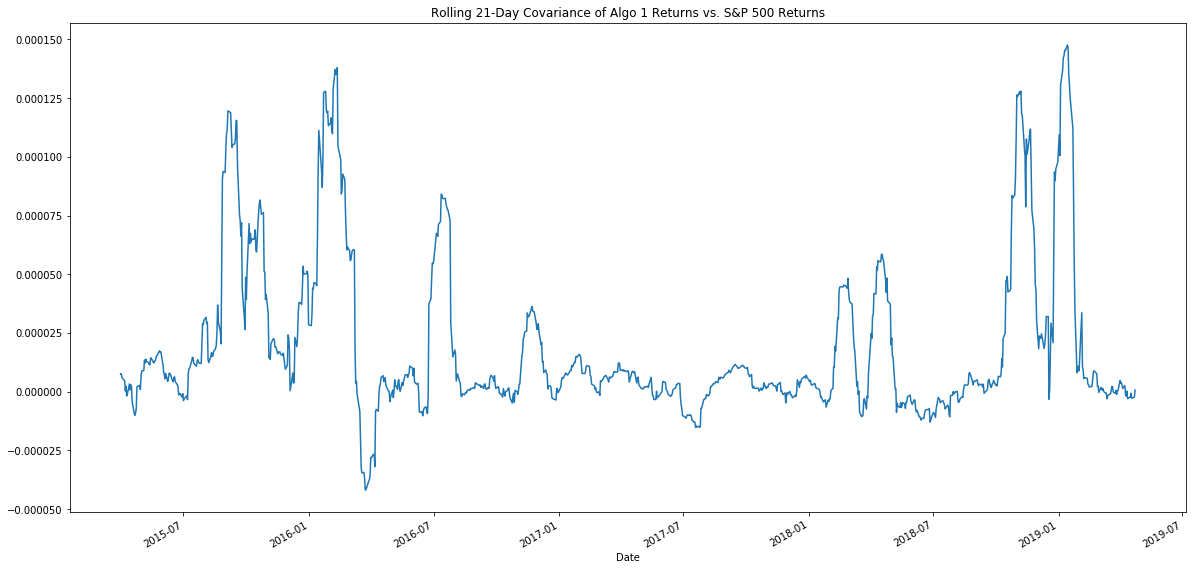

In [26]:
# First calculate and plot 21 day rolling covariance of Algo 1 and S&P 500
rolling_covariance = joined_returns['Algo 1'].rolling(window=21).cov(joined_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

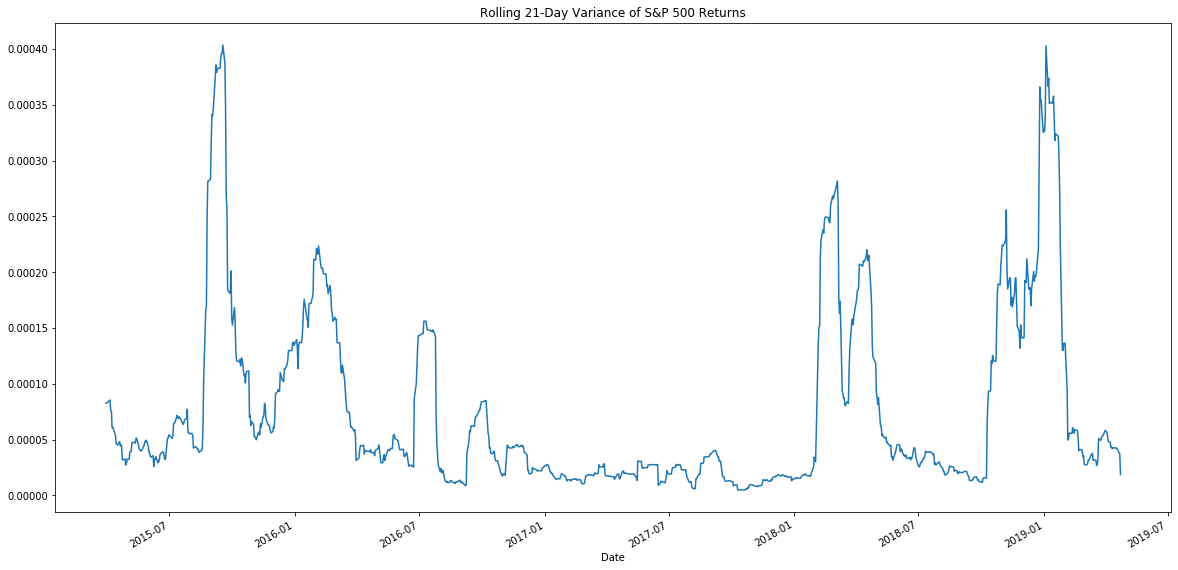

In [27]:
# Second, calculate and plot 21 day rolling variance of S&P 500
rolling_variance = joined_returns['S&P 500'].rolling(window=21).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 21-Day Variance of S&P 500 Returns')

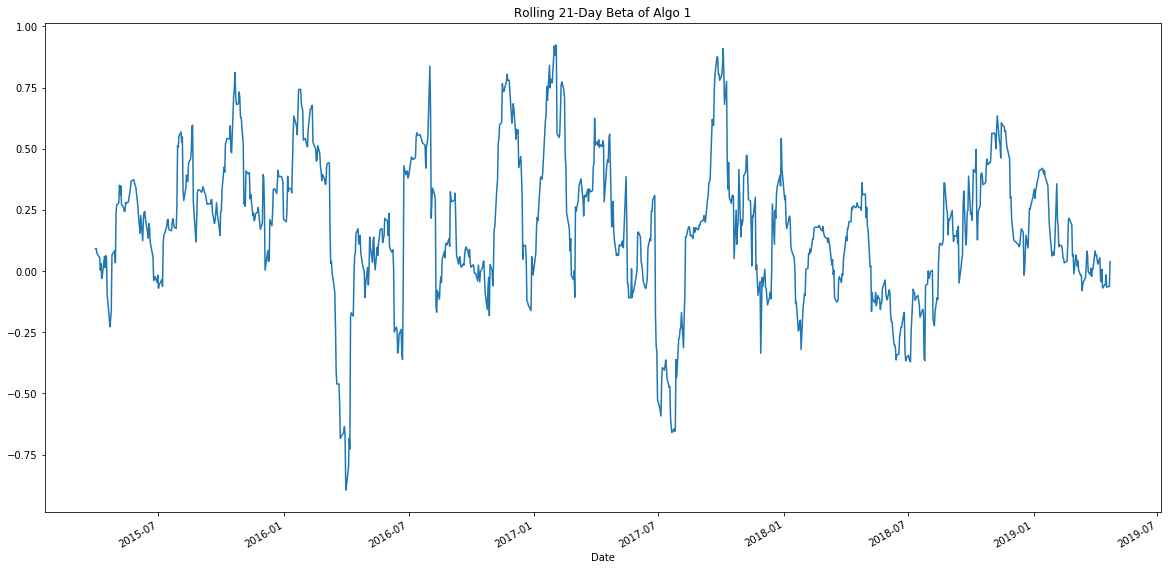

In [28]:
# Finally, calculate and plot 21 day rolling Beta of Algo 1
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Algo 1')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [29]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_returns.mean()*252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

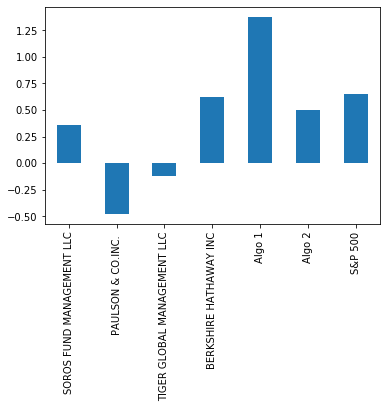

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind=("bar"))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock
!pip install yfinance
import yfinance as yf
ticker_symbol = "SPY"
ticker_data = yf.Ticker(ticker_symbol)
spy_df = ticker_data.history(period="1d", start="2018-4-20", end="2019-4-24")
spy_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-20,258.41,258.65,255.34,256.30,99953100,0.0,0
2018-04-23,256.92,257.53,255.09,256.26,65558000,0.0,0
2018-04-24,257.38,257.62,251.18,252.81,112885500,0.0,0
2018-04-25,252.74,253.92,250.76,253.43,103840900,0.0,0
2018-04-26,254.55,256.91,254.07,256.01,67731900,0.0,0
...,...,...,...,...,...,...,...
2019-04-16,285.12,285.18,283.70,284.35,52153200,0.0,0
2019-04-17,285.57,285.59,283.20,283.65,58268300,0.0,0
2019-04-18,284.29,284.51,282.88,284.21,68708500,0.0,0


In [33]:
# Rename "Close" column to stock ticker and drop extraneous columns
spy_df = spy_df.rename(columns={
    "Close": "SPY"})
spy_df = spy_df.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
spy_df

,SPY
Date,
2018-04-20,256.30
2018-04-23,256.26
2018-04-24,252.81
2018-04-25,253.43
2018-04-26,256.01
...,...
2019-04-16,284.35
2019-04-17,283.65
2019-04-18,284.21


In [34]:
# Read the second stock
ticker_symbol_2 = "IEF"
ticker_data_2 = yf.Ticker(ticker_symbol_2)
ief_df = ticker_data_2.history(period="1d", start="2018-4-20", end="2019-4-24")
ief_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-20,97.41,97.47,97.21,97.21,2309400,0.0,0
2018-04-23,97.13,97.17,96.99,97.12,5022800,0.0,0
2018-04-24,96.98,97.10,96.92,97.00,3178800,0.0,0
2018-04-25,96.85,96.91,96.72,96.79,3295800,0.0,0
2018-04-26,97.02,97.11,96.96,97.07,1989500,0.0,0
...,...,...,...,...,...,...,...
2019-04-16,103.13,103.19,102.97,102.99,5003600,0.0,0
2019-04-17,102.94,103.12,102.94,103.01,2348800,0.0,0
2019-04-18,103.27,103.39,103.23,103.26,4893200,0.0,0


In [35]:
# Rename "Close" column to stock ticker and drop extraneous columns
ief_df = ief_df.rename(columns={
    "Close": "IEF"})
ief_df = ief_df.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
ief_df

,IEF
Date,
2018-04-20,97.21
2018-04-23,97.12
2018-04-24,97.00
2018-04-25,96.79
2018-04-26,97.07
...,...
2019-04-16,102.99
2019-04-17,103.01
2019-04-18,103.26


In [36]:
# Read the third stock
ticker_symbol_3 = "USO"
ticker_data_3 = yf.Ticker(ticker_symbol_3)
uso_df = ticker_data_3.history(period="1d", start="2018-4-20", end="2019-4-24")
uso_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-20,109.28,110.72,108.96,110.00,1478900,0,0
2018-04-23,108.88,111.52,108.40,111.36,2074100,0,0
2018-04-24,110.80,112.00,109.04,109.44,2510100,0,0
2018-04-25,109.52,110.08,108.40,109.76,1707300,0,0
2018-04-26,110.64,110.72,109.36,110.16,2151700,0,0
...,...,...,...,...,...,...,...
2019-04-16,105.84,107.04,105.04,106.96,1681200,0,0
2019-04-17,107.04,107.12,106.08,106.24,1932500,0,0
2019-04-18,106.40,106.72,105.84,106.56,1549100,0,0


In [37]:
# Rename "Close" column to stock ticker and drop extraneous columns
uso_df = uso_df.rename(columns={
    "Close": "USO"})
uso_df = uso_df.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
uso_df

,USO
Date,
2018-04-20,110.00
2018-04-23,111.36
2018-04-24,109.44
2018-04-25,109.76
2018-04-26,110.16
...,...
2019-04-16,106.96
2019-04-17,106.24
2019-04-18,106.56


In [38]:
# Read the fourth stock
ticker_symbol_4 = "GLD"
ticker_data_4 = yf.Ticker(ticker_symbol_4)
gld_df = ticker_data_4.history(period="1d", start="2018-4-20", end="2019-4-24")
gld_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-20,126.69,126.97,126.55,126.63,10403100,0,0
2018-04-23,125.62,125.76,125.34,125.62,6921500,0,0
2018-04-24,125.78,126.34,125.67,126.23,4733100,0,0
2018-04-25,125.23,125.51,125.06,125.41,5985700,0,0
2018-04-26,125.54,125.57,124.69,124.97,7517100,0,0
...,...,...,...,...,...,...,...
2019-04-16,120.38,120.63,120.19,120.51,10097800,0,0
2019-04-17,120.46,120.51,120.20,120.28,4693900,0,0
2019-04-18,120.24,120.54,120.15,120.37,4090400,0,0


In [39]:
# Rename "Close" column to stock ticker and drop extraneous columns
gld_df = gld_df.rename(columns={
    "Close": "GLD"})
gld_df = gld_df.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
gld_df

,GLD
Date,
2018-04-20,126.63
2018-04-23,125.62
2018-04-24,126.23
2018-04-25,125.41
2018-04-26,124.97
...,...
2019-04-16,120.51
2019-04-17,120.28
2019-04-18,120.37


In [40]:
# Concatenate all stocks into a single DataFrame
custom_stocks = pd.concat([spy_df, ief_df, uso_df, gld_df], axis="columns", join="inner")
custom_stocks.head()

,SPY,IEF,USO,GLD
Date,,,,
2018-04-20,256.30,97.21,110.00,126.63
2018-04-23,256.26,97.12,111.36,125.62
2018-04-24,252.81,97.00,109.44,126.23
2018-04-25,253.43,96.79,109.76,125.41
2018-04-26,256.01,97.07,110.16,124.97


In [41]:
# Drop Nulls
custom_stocks.dropna()
custom_stocks

,SPY,IEF,USO,GLD
Date,,,,
2018-04-20,256.30,97.21,110.00,126.63
2018-04-23,256.26,97.12,111.36,125.62
2018-04-24,252.81,97.00,109.44,126.23
2018-04-25,253.43,96.79,109.76,125.41
2018-04-26,256.01,97.07,110.16,124.97
...,...,...,...,...
2019-04-16,284.35,102.99,106.96,120.51
2019-04-17,283.65,103.01,106.24,120.28
2019-04-18,284.21,103.26,106.56,120.37


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Calculate daily returns for the new portfolio
custom_returns = custom_stocks.pct_change()
custom_returns

,SPY,IEF,USO,GLD
Date,,,,
2018-04-20,NaN,NaN,NaN,NaN
2018-04-23,-0.000156,-0.000926,0.012364,-0.007976
2018-04-24,-0.013463,-0.001236,-0.017241,0.004856
2018-04-25,0.002452,-0.002165,0.002924,-0.006496
2018-04-26,0.010180,0.002893,0.003644,-0.003508
...,...,...,...,...
2019-04-16,0.000669,-0.003387,0.009819,-0.008964
2019-04-17,-0.002462,0.000194,-0.006731,-0.001909
2019-04-18,0.001974,0.002427,0.003012,0.000748


In [43]:
# Construct a correlation table as a test to see if stocks within custom portfolio are correlated
correlation_test = custom_returns.corr()
correlation_test

,SPY,IEF,USO,GLD
SPY,1.000000,-0.428153,0.378682,-0.109712
IEF,-0.428153,1.000000,-0.158880,0.304489
USO,0.378682,-0.158880,1.000000,0.031347
GLD,-0.109712,0.304489,0.031347,1.000000


In [44]:
# Calculate weighted portfolio returns
# weights = [1/3, 1/3, 1/3]
spy_weight = 1/4
ief_weight = 1/4
uso_weight = 1/4
gld_weight = 1/4
weighted_returns = spy_weight * custom_returns['SPY'] + ief_weight * custom_returns["IEF"] + uso_weight * custom_returns["USO"] + gld_weight * custom_returns["GLD"]
weighted_returns

Date
2018-04-20         NaN
2018-04-23    0.000826
2018-04-24   -0.006771
2018-04-25   -0.000821
2018-04-26    0.003302
                ...   
2019-04-16   -0.000466
2019-04-17   -0.002727
2019-04-18    0.002040
2019-04-22    0.006426
2019-04-23    0.004386
Length: 253, dtype: float64

In [45]:
# Append weighted_returns values to custom_returns dataframe
custom_returns['Custom'] = weighted_returns
custom_returns

,SPY,IEF,USO,GLD,Custom
Date,,,,,
2018-04-20,NaN,NaN,NaN,NaN,NaN
2018-04-23,-0.000156,-0.000926,0.012364,-0.007976,0.000826
2018-04-24,-0.013463,-0.001236,-0.017241,0.004856,-0.006771
2018-04-25,0.002452,-0.002165,0.002924,-0.006496,-0.000821
2018-04-26,0.010180,0.002893,0.003644,-0.003508,0.003302
...,...,...,...,...,...
2019-04-16,0.000669,-0.003387,0.009819,-0.008964,-0.000466
2019-04-17,-0.002462,0.000194,-0.006731,-0.001909,-0.002727
2019-04-18,0.001974,0.002427,0.003012,0.000748,0.002040


In [46]:
# Remove SPY IEF USO and GLD columns from custom_returns dataframe and rename dataframe as portfolio_returns
portfolio_returns = custom_returns.drop(columns=["SPY", "IEF", "USO", "GLD"])
portfolio_returns

,Custom
Date,
2018-04-20,NaN
2018-04-23,0.000826
2018-04-24,-0.006771
2018-04-25,-0.000821
2018-04-26,0.003302
...,...
2019-04-16,-0.000466
2019-04-17,-0.002727
2019-04-18,0.002040


## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_returns = pd.concat([joined_returns, portfolio_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-04-20,-0.007810,-0.004990,-0.018703,-0.008744,0.002837,-0.004502,-0.008537,NaN
2018-04-23,0.002767,-0.000789,-0.008146,-0.005842,0.005675,-0.003902,0.000056,0.000826
2018-04-24,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381,-0.006771
2018-04-25,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837,-0.000821
2018-04-26,0.007127,0.004416,0.005724,0.018664,-0.003238,0.005543,0.010434,0.003302


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna()
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-04-20,-0.007810,-0.004990,-0.018703,-0.008744,0.002837,-0.004502,-0.008537,NaN
2018-04-23,0.002767,-0.000789,-0.008146,-0.005842,0.005675,-0.003902,0.000056,0.000826
2018-04-24,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381,-0.006771
2018-04-25,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837,-0.000821
2018-04-26,0.007127,0.004416,0.005724,0.018664,-0.003238,0.005543,0.010434,0.003302
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000466
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.002727
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.002040


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

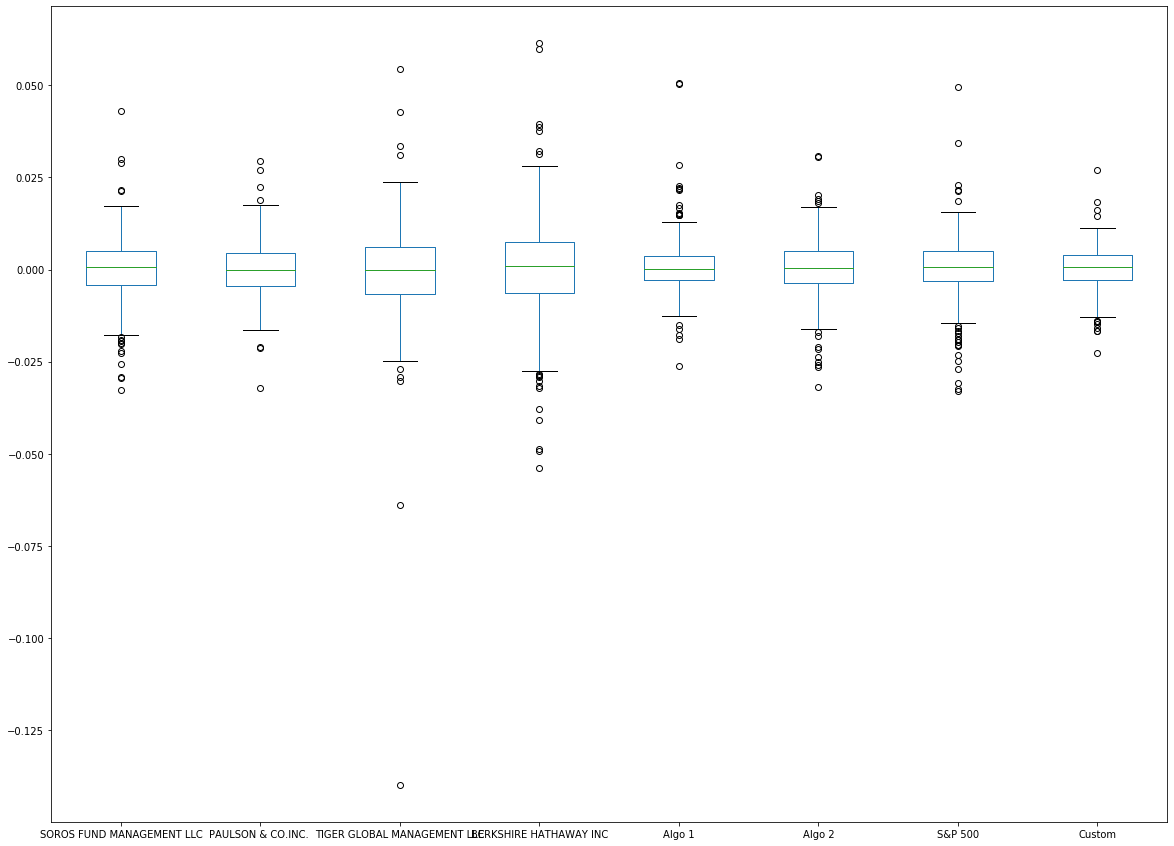

In [49]:
# Risk
# Plot returns of portfolio to visually see risk
all_returns.plot(kind="box", figsize = (20,15))

In [50]:
# Calculate the standard deviation for each portfolio
all_std = all_returns.std()
all_std = all_std.sort_values(ascending=True)
all_std

Custom                         0.006079
PAULSON & CO.INC.              0.007331
Algo 1                         0.008208
Algo 2                         0.008590
SOROS FUND MANAGEMENT LLC      0.009346
S&P 500                        0.009449
TIGER GLOBAL MANAGEMENT LLC    0.014653
BERKSHIRE HATHAWAY INC         0.015190
dtype: float64

In [51]:
# Calculate the annualized standard deviation (252 trading days)
annual_all_std = all_std * np.sqrt(252)
annual_all_std

Custom                         0.096504
PAULSON & CO.INC.              0.116370
Algo 1                         0.130302
Algo 2                         0.136360
SOROS FUND MANAGEMENT LLC      0.148368
S&P 500                        0.150005
TIGER GLOBAL MANAGEMENT LLC    0.232605
BERKSHIRE HATHAWAY INC         0.241130
dtype: float64

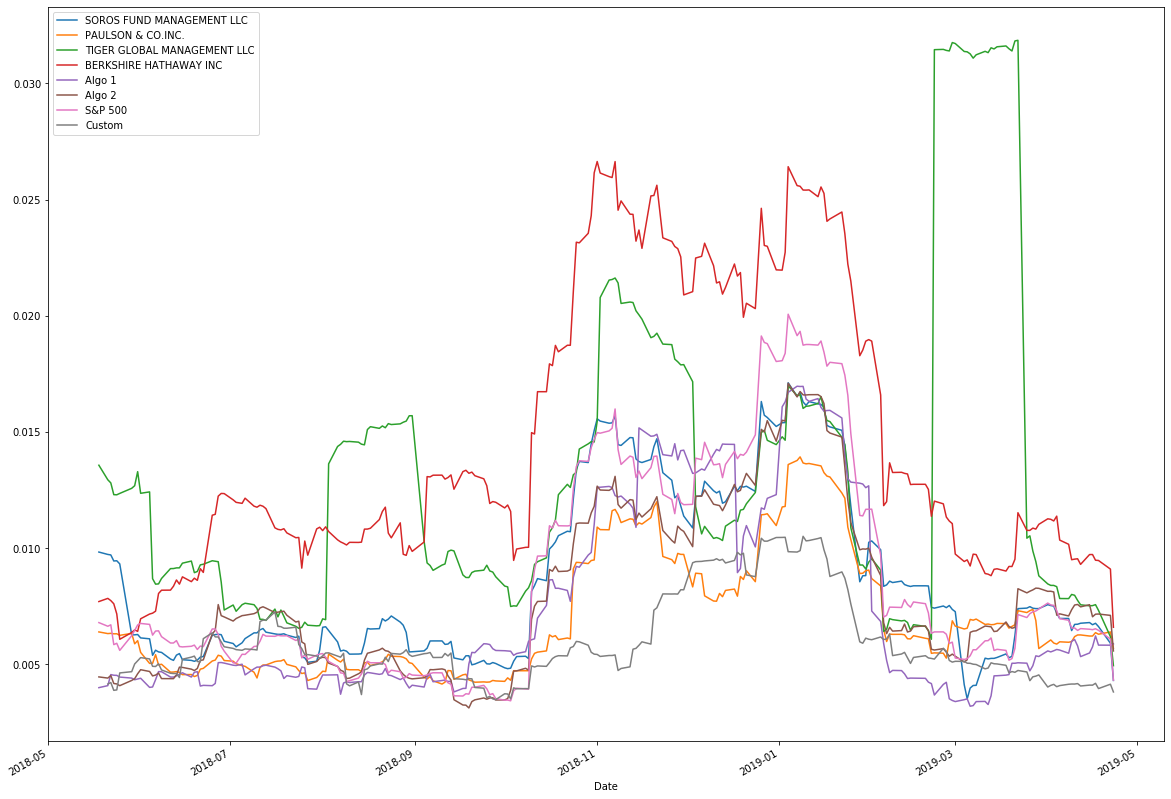

In [52]:
# Calculate and plot the rolling standard deviation using a 21 trading day window
all_returns.rolling(window=21).std().plot(figsize=(20,15))

In [53]:
# Calculate Beta for Custom portfolio compared to the total market (S&P 500)
# First calculate the covariance of Algo 1 and S&P 500
covariance_custom = all_returns["Custom"].cov(all_returns["S&P 500"])
covariance_custom

3.4401816086589166e-05

In [54]:
# Next calculate the variance of S&P 500
variance_custom = all_returns["S&P 500"].var()
variance_custom

8.92914806413172e-05

In [55]:
# Finally, calculate Beta
custom_beta = covariance_custom / variance_custom
custom_beta

0.3852754578544939

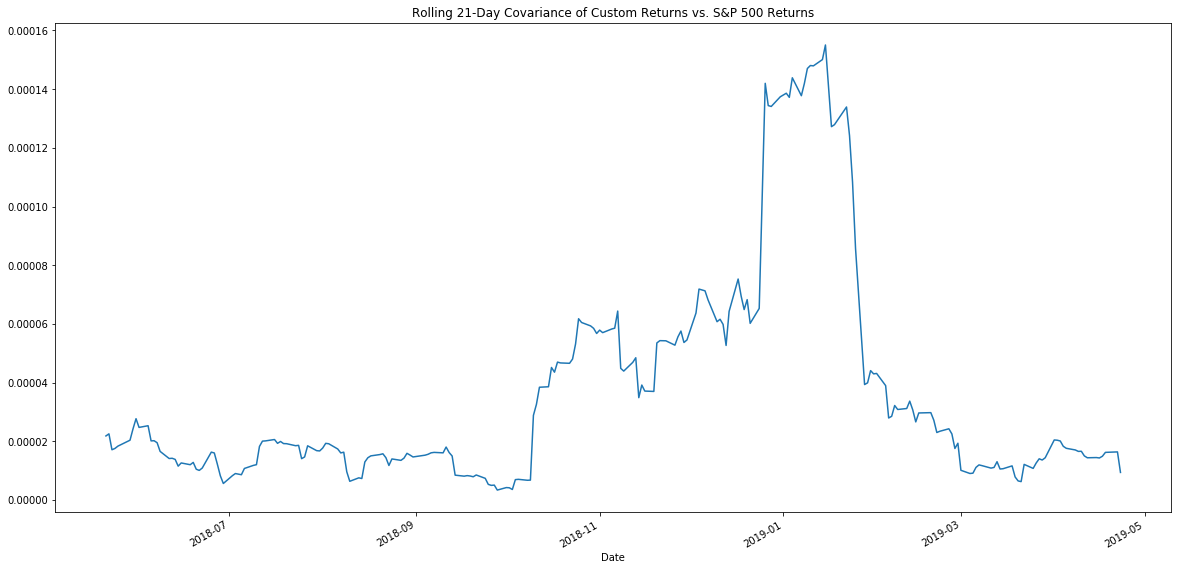

In [56]:
# First calculate and plot 21 day rolling covariance of Custom and S&P 500
rolling_covariance_custom = all_returns['Custom'].rolling(window=21).cov(all_returns['S&P 500'])
rolling_covariance_custom.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Custom Returns vs. S&P 500 Returns')

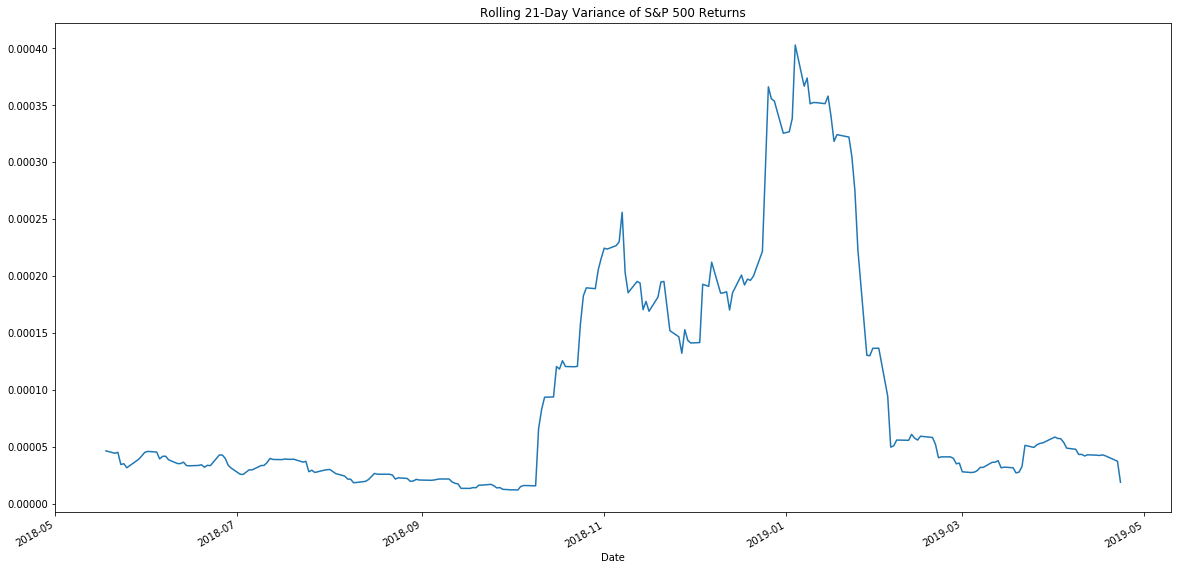

In [57]:
# Second, calculate and plot 21 day rolling variance of S&P 500
rolling_variance_custom = all_returns['S&P 500'].rolling(window=21).var()
rolling_variance_custom.plot(figsize=(20, 10), title='Rolling 21-Day Variance of S&P 500 Returns')

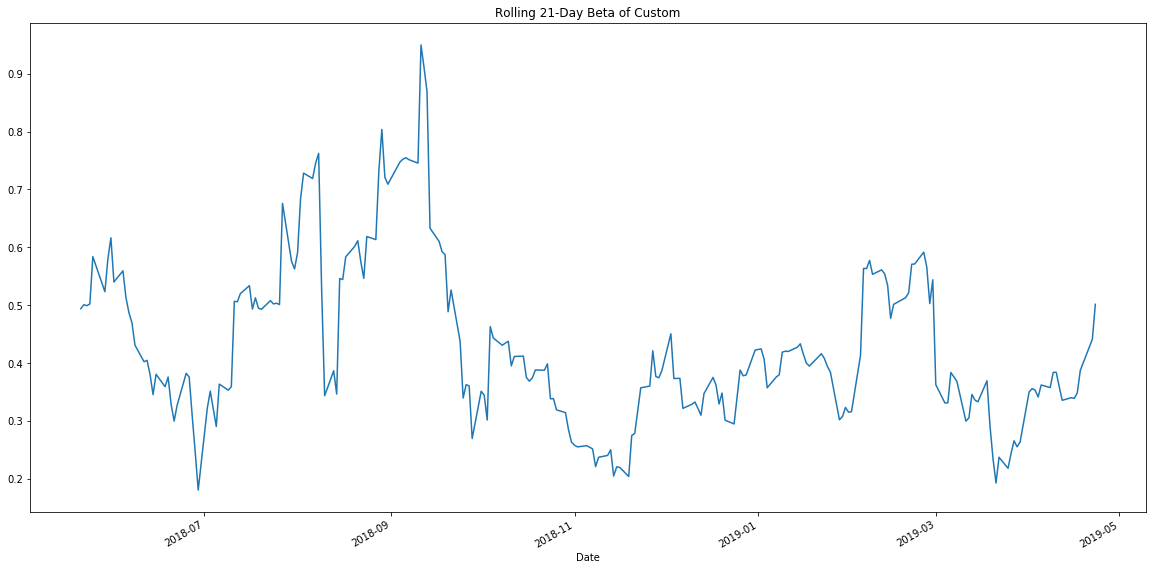

In [58]:
# Finally, calculate and plot 21 day rolling Beta of Custom
rolling_beta_custom = rolling_covariance_custom / rolling_variance_custom
rolling_beta_custom.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Custom')

In [59]:
# Annualized Sharpe Ratios
sharpe_ratios_custom = (all_returns.mean()*252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_custom

SOROS FUND MANAGEMENT LLC      0.254962
PAULSON & CO.INC.              0.063575
TIGER GLOBAL MANAGEMENT LLC   -0.974080
BERKSHIRE HATHAWAY INC         0.160775
Algo 1                         2.202375
Algo 2                         0.100049
S&P 500                        0.642901
Custom                         0.481426
dtype: float64

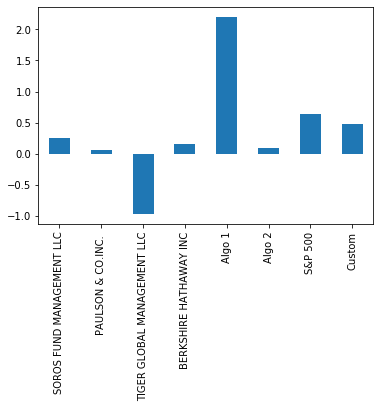

In [60]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind=("bar"))

## Include correlation analysis to determine which stocks (if any) are correlated

In [61]:
# Construct a correlation table
correlation_custom = all_returns.corr()
correlation_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.761291,0.471351,0.796175,0.323228,0.831342,0.848592,0.514486
PAULSON & CO.INC.,0.761291,1.000000,0.488108,0.639105,0.345004,0.773552,0.764860,0.478640
TIGER GLOBAL MANAGEMENT LLC,0.471351,0.488108,1.000000,0.329123,0.109377,0.415009,0.494731,0.288887
BERKSHIRE HATHAWAY INC,0.796175,0.639105,0.329123,1.000000,0.320126,0.781623,0.846313,0.526104
Algo 1,0.323228,0.345004,0.109377,0.320126,1.000000,0.356438,0.276674,0.260791
Algo 2,0.831342,0.773552,0.415009,0.781623,0.356438,1.000000,0.873523,0.574611
S&P 500,0.848592,0.764860,0.494731,0.846313,0.276674,0.873523,1.000000,0.598741
Custom,0.514486,0.478640,0.288887,0.526104,0.260791,0.574611,0.598741,1.000000


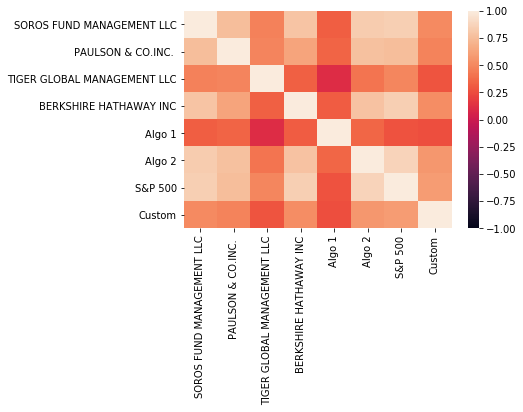

In [62]:
# Construct a heatmap to visually analyze correlation
import seaborn as sns
sns.heatmap(correlation_custom, vmin=-1, vmax=1)